In [1]:
#importing libraries
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

In [2]:
df=pd.read_csv(r"C:\Users\M RAJESH\Desktop\Ekeeda DS\spam.csv", encoding='ISO-8859-1') #reading csv file

In [3]:
df.head() #printing 5 rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info() 
#information of dataset to understand well. it gives information regarding non nulll values, datatype,total entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isnull().sum() #checking null values

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.shape #printing rows and columns of df

(5572, 5)

As we can see the null values of unnamed 2,3,4 columns are much high, so we can delete those columns from df

In [7]:
df['Unnamed: 2'].value_counts() #value count of unnamed: 2

 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
GN                                                                                                                                                  2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 Gud night...."                                                                                     

In [8]:
df['Unnamed: 3'].value_counts() 
#value counts for unnamed 3 column

 MK17 92H. 450Ppw 16"                         2
GE                                            2
 why to miss them                             1
U NO THECD ISV.IMPORTANT TOME 4 2MORO\""      1
i wil tolerat.bcs ur my someone..... But      1
 ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""    1
whoever is the KING\"!... Gud nyt"            1
 TX 4 FONIN HON                               1
 \"OH No! COMPETITION\". Who knew             1
IåÕL CALL U\""                                1
Name: Unnamed: 3, dtype: int64

In [9]:
df['Unnamed: 4'].value_counts()
#value counts for unnamed 4 column

GNT:-)"                                                     2
 just Keep-in-touch\" gdeve.."                              1
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
Name: Unnamed: 4, dtype: int64

In [10]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True) 
#droping those 3 columns which have high null values

In [11]:
df.rename(columns ={'v1':'target',"v2":'independent'},inplace=True)
#renaming the remaining columns from v1, v2 to target and independent respectively

In [12]:
df.head() #printing 5 columns

,target,independent
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# data visualization
#### this helps in understanding the data well so that we can do preprocessing and feature selection, extraction well

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

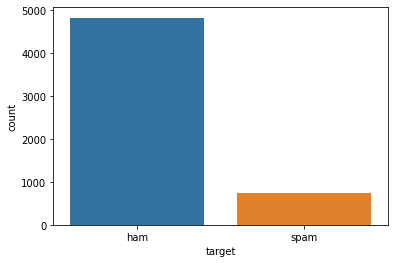

In [13]:
sns.countplot(df['target']) 
#printing the countplot for target column

here we can see that non spam values are more then spam values. and also the target variable has imbalance data

In [14]:
#sns.swarmplot(x=df['independent'],y=df['target'])

In [15]:
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*df["independent"][:5], sep = "\n") #first 5 rows

 The First 5 Texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [16]:
print(df['independent']) #some rows of independent column

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: independent, Length: 5572, dtype: object


In [17]:
df['independent'][18] #printing 19th column of independent column

'Fine if thatåÕs the way u feel. ThatåÕs the way its gota b'

# converting to lower case

In [18]:
df["independent"] = df["independent"].str.lower() #converting to lower case
df.head() #printing 5 rows 

,target,independent
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [19]:
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*df["independent"][15:16], sep = "\n") #printing the rows of 15th column

 The First 5 Texts:
xxxmobilemovieclub: to use your credit, click the wap link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=qjkgighjjgcbl


# Removing_html_tags

In [20]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?/\>')
    return re.sub(clean, '', text)

In [21]:
df['independent'] = df['independent'].apply(remove_html_tags) #applying html tag removal to independent column

In [22]:
print("\033[1m\u001b[45;1m The First 15 Texts:\033[0m",*df["independent"][15:16], sep = "\n") #first 15th row

 The First 15 Texts:
xxxmobilemovieclub: to use your credit, click the wap link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=qjkgighjjgcbl


# clean up the text

In [23]:
# Defining a function to clean up the text
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split() #spliting the text
    sms = ' '.join(sms)
    return sms

df["independent"] = df["independent"].apply(Clean) #applying the clean function to the independent column

In [24]:
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*df['independent'][15:16], sep = "\n") #first 15th row

 The First 5 Texts:
xxxmobilemovieclub to use your credit click the wap link in the next txt message or click here http wap xxxmobilemovieclub com n qjkgighjjgcbl


# Removing punctuations

In [25]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["independent"] = df["independent"].apply(lambda text: remove_punctuation(text)) #applying the punctuation removal function
df.head(50)

,target,independent
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
5,spam,freemsg hey there darling it s been week s now...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile months or more u r entitled to...


In [26]:
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*df['independent'][68:69], sep = "\n") #printing the particular row

 The First 5 Texts:
did you hear about the new divorce barbie it comes with all of ken s stuff


punctuations are removed from the text

# Stop words removal

In [27]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["independent"] = df["independent"].apply(lambda text: remove_stopwords(text)) #applying the removal of stopword function from independent column
df.head()

,target,independent
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


# Stemming
It is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words 

In [28]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["independent"] = df["independent"].apply(lambda text: stem_words(text)) #applying stemming to the independent column
df.head() #printing 5 rows

,target,independent
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

data["Lemmatized_Text"] = df["independent"].apply(lemmatize_word)

In [29]:
df

,target,independent
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though
...,...,...
5567,spam,nd time tri contact u u pound prize claim easi...
5568,ham,b go esplanad fr home
5569,ham,piti mood suggest
5570,ham,guy bitch act like interest buy someth els nex...


In [30]:
from sklearn.feature_extraction.text import CountVectorizer #count vectorizer library is imported

In [31]:
cv = CountVectorizer()

In [32]:
x= cv.fit_transform(df['independent']) #fitting and transforming the independent column into count vectorizer

In [33]:
x = x.toarray() #converting to array

In [34]:
sorted(cv.vocabulary_.keys()) #checking vocabularies

['aa',
 'aah',
 'aaniy',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'abil',
 'abiola',
 'abj',
 'abl',
 'abnorm',
 'abouta',
 'abroad',
 'absenc',
 'absolut',
 'absolutli',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abus',
 'ac',
 'academ',
 'acc',
 'accent',
 'accentur',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accommodationvouch',
 'accomod',
 'accordin',
 'accordingli',
 'account',
 'accumul',
 'ach',
 'achan',
 'achiev',
 'acid',
 'acknowledg',
 'acl',
 'acnt',
 'aco',
 'across',
 'act',
 'actin',
 'action',
 'activ',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addi',
 'addict',
 'address',
 'adewal',
 'adi',
 'adjust',
 'admin',
 'administr',
 'admir',
 'admiss',
 'admit',
 'ador',
 'adp',
 'adress',
 'adrian',
 'adsens',
 'adult',
 'advanc',
 'adventur',
 'advic',
 'advis',
 'advisor',
 'ae',
 'aeronaut',
 'aeroplan',
 'afew',
 'affair',
 'affect',
 'affection',
 'affidavit',
 'afford',
 'afghan

In [35]:
df['target']=pd.get_dummies(df['target'],drop_first=True)
#using getdummies to encode the target column

In [36]:
df.head() #printing 5 rows

,target,independent
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [37]:
from nltk.tokenize import word_tokenize #importing word tokenzier library
df['independent'] = df.independent.apply(word_tokenize) #applying work tokenzie library to independent column

In [38]:
df.head() #printing 5 rows

,target,independent
0,0,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,"[ok, lar, joke, wif, u, oni]"
2,1,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"[nah, think, goe, usf, live, around, though]"


In [39]:
y =df["target"]  
# Splitting the testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
x_train.shape #rows and columns of x_train

(4457, 6221)

In [41]:
y_train.shape#rows and columns of y_train

(4457,)

# Model building using Machine Learning Algorithms

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
reg =LogisticRegression()
  
# train the model using the training sets
reg.fit(x_train, y_train)
 
# making predictions on the testing set
y_pred = reg.predict(x_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",
metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 97.75784753363229


In [43]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score, classification_report, accuracy_score, f1_score

In [44]:
confusion_matrix(y_test, y_pred)

array([[965,   0],
       [ 25, 125]], dtype=int64)

In [45]:
precision_score(y_test,y_pred)

1.0

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## NAIVE BAYES

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(x_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 86.27802690582959


In [48]:

confusion_matrix(y_test, y_pred)

array([[828, 137],
       [ 16, 134]], dtype=int64)

## RANDOM FOREST CLASSIFIER

In [49]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="gini")  
classifier.fit(x_train, y_train)  
# making predictions on the testing set
y_pred = classifier.predict(x_test)
from sklearn import metrics
print("Gaussian rf model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian rf model accuracy(in %): 97.04035874439462


In [50]:
confusion_matrix(y_test, y_pred)

array([[965,   0],
       [ 33, 117]], dtype=int64)

## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
  
knn.fit(x_train, y_train)
  
# Predict on dataset which model has not seen before
y_pred=knn.predict(x_test)

print(" knn model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

 knn model accuracy(in %): 91.92825112107623


## support vector classifier

In [52]:
from sklearn.svm import SVC


svc=SVC()
  
svc.fit(x_train, y_train)
  
# Predict on dataset which model has not seen before
y_pred=svc.predict(x_test)

print(" svc model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

 svc model accuracy(in %): 97.75784753363229


In [53]:
confusion_matrix(y_test, y_pred)

array([[965,   0],
       [ 25, 125]], dtype=int64)

#logisticRegression gives highest accuracy